In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import os


In [2]:
try:
    os.chdir('C:\\Users\\111\\OneDrive\\Python_machine_learning_book\\raw_data')
except:
    os.chdir('C:\\Users\\Li\\OneDrive\\Python_machine_learning_book\\raw_data')

In [3]:
col_names =pd.read_excel('Data_Dictionary.xlsx')
col_names =col_names.iloc[:,1]
print(col_names)

0                         ID
1                       FICO
2           Business Revenue
3                        TSR
4           Last 6M Avg Util
5                     Income
6          Last 6M Avg Remit
7            Last 6M Avg Bal
8           Internal Revolve
9     Lending AR% in last 6M
10           ExternalBalance
11        Months in Business
12      preferred_spend_line
13               total_cards
14        preferred_bal_line
15        preavgremit1_3_all
16         External_rev_rate
17       Supplementary Cards
18              isChargeCust
19                       CMV
20             Assigned Line
21                       NaN
22    Additional Definitions
23               Credit Line
24     Average Daily Balance
25                 External 
26               Charge Card
Name: Variable Name, dtype: object


In [4]:
df_1 =pd.read_csv('development_dataset.csv', names=col_names, low_memory=False, skiprows=1)
df_1.sample(10)

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Supplementary Cards,isChargeCust,CMV,Assigned Line,nan,Additional Definitions,Credit Line,Average Daily Balance,External,Charge Card
18564,18565,962.352941,1.944444,NaN,617.756373,18.181818,0.840289,197.429694,NaN,58.632548,...,0,0,102.731497,Medium,NaN,NaN,NaN,NaN,NaN,NaN
22434,22435,997.647059,22.222222,NaN,611.737560,31.818182,0.571313,196.935084,14.245319,58.632548,...,0,0,201.734940,Low,NaN,NaN,NaN,NaN,NaN,NaN
8230,8231,796.470588,0.833333,250.000000,635.396151,4.545455,0.815832,197.410661,NaN,58.632548,...,0,0,153.480207,High,NaN,NaN,NaN,NaN,NaN,NaN
2120,2121,865.882353,0.027778,321.428571,724.262048,18.181818,2.873205,207.588769,NaN,58.632548,...,0,0,87.977625,Medium,NaN,NaN,NaN,NaN,NaN,NaN
17182,17183,934.117647,0.138889,142.857143,660.323979,6.545455,0.842735,197.933244,NaN,58.632548,...,1,0,96.041308,Medium,NaN,NaN,NaN,NaN,NaN,NaN
17725,17726,944.705882,0.055556,71.428571,621.782920,8.181818,1.795572,200.093436,NaN,52.505157,...,0,1,144.741824,Low,NaN,NaN,NaN,NaN,NaN,NaN
14009,14010,924.705882,0.555556,35.714286,634.524316,5.454545,1.304680,199.172441,NaN,58.632548,...,0,0,134.457831,Low,NaN,NaN,NaN,NaN,NaN,NaN
4793,4794,941.176471,0.088889,35.714286,614.381076,2.727273,0.610010,197.014840,49.751669,58.632548,...,0,0,103.106713,Low,NaN,NaN,NaN,NaN,NaN,NaN
23359,23360,997.647059,1.944444,35.714286,615.266916,14.727273,4.448483,198.621181,NaN,53.856424,...,0,1,106.130809,Low,NaN,NaN,NaN,NaN,NaN,NaN
14910,14911,940.000000,2.222222,35.714286,637.054038,90.909091,1.507455,198.584885,NaN,58.632548,...,1,0,129.166954,High,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1 = df_1.iloc[:, :21]
df_1.sample(10)

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Assigned Line
10837,10838,842.352941,0.111667,571.428571,611.574748,0.910909,0.578746,196.976870,14.574715,47.899686,...,300.250208,2.333333,1,11.666667,0.985547,952.31,0,1,82.652324,Medium
22601,22602,985.882353,1.944444,NaN,618.859297,5.181818,0.763531,197.369396,NaN,58.632548,...,130.108424,13.666667,1,13.666667,1.119481,NaN,0,0,101.280551,Medium
22577,22578,901.176471,0.388889,535.714286,704.701782,2.272727,1.015969,199.644437,18.617306,58.632548,...,40.033361,2.333333,3,2.333333,1.609752,NaN,2,0,167.327022,Medium
33781,33782,924.705882,0.012778,NaN,615.270418,NaN,1.117285,197.143729,1.916487,58.632548,...,NaN,NaN,1,NaN,1.314260,NaN,0,0,135.423408,Low
25220,25221,922.352941,3.333333,178.571429,611.574748,22.727273,0.681974,197.154732,6.553702,NaN,...,140.116764,10.000000,1,10.000000,1.067309,NaN,2,0,97.423408,High
4377,4378,872.941177,0.027778,NaN,622.947117,2.727273,0.796305,197.373807,NaN,58.632548,...,5.004170,6.466667,1,6.466667,1.103893,NaN,0,0,110.695353,Medium
24563,24564,NaN,0.055556,357.142857,650.817827,3.181818,0.858785,200.892985,NaN,58.632548,...,10.008340,NaN,1,NaN,1.118281,NaN,1,0,90.550775,Low
20322,20323,837.647059,33.333333,214.285714,611.574748,13.636364,1.203983,199.476594,40.477240,NaN,...,70.058382,5.926667,1,5.926667,1.481469,1000.00,4,1,402.289157,Low
11823,11824,928.235294,NaN,NaN,638.165715,22.727273,2.760797,201.381965,NaN,58.632548,...,100.083403,NaN,2,NaN,3.109633,NaN,0,0,114.629948,Low
15006,15007,944.705882,0.166667,NaN,638.762695,11.363636,2.358210,201.014938,NaN,58.632548,...,15.012510,7.000000,1,7.000000,2.520246,NaN,1,0,124.672978,Low


In [6]:
missing =pd.DataFrame(df_1.isnull().sum().sort_values(ascending=False)/len(df_1), columns=['%missing'])
print(missing)
drop_missing =missing.nlargest(2, '%missing').index
missing[missing['%missing']<0.1].index

                        %missing
External_rev_rate       0.652765
Internal Revolve        0.465206
TSR                     0.367471
Months in Business      0.308882
preferred_spend_line    0.250647
preferred_bal_line      0.236000
ExternalBalance         0.222500
Lending AR% in last 6M  0.133824
Income                  0.102794
Business Revenue        0.099559
FICO                    0.028265
preavgremit1_3_all      0.025471
Last 6M Avg Bal         0.024559
Last 6M Avg Remit       0.024559
Last 6M Avg Util        0.000029
Assigned Line           0.000000
CMV                     0.000000
total_cards             0.000000
Supplementary Cards     0.000000
isChargeCust            0.000000
ID                      0.000000


Index(['Business Revenue', 'FICO', 'preavgremit1_3_all', 'Last 6M Avg Bal',
       'Last 6M Avg Remit', 'Last 6M Avg Util', 'Assigned Line', 'CMV',
       'total_cards', 'Supplementary Cards', 'isChargeCust', 'ID'],
      dtype='object')

In [7]:
df_2 =df_1.drop(drop_missing, axis=1)
print(df_1.shape, df_2.shape)

(34000, 21) (34000, 19)


In [8]:
print(df_2.columns)
print(df_2.isnull().sum().sort_values(ascending=False)/len(df_2))

Index(['ID', 'FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Lending AR% in last 6M',
       'ExternalBalance', 'Months in Business', 'preferred_spend_line',
       'total_cards', 'preferred_bal_line', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV', 'Assigned Line'],
      dtype='object')
TSR                       0.367471
Months in Business        0.308882
preferred_spend_line      0.250647
preferred_bal_line        0.236000
ExternalBalance           0.222500
Lending AR% in last 6M    0.133824
Income                    0.102794
Business Revenue          0.099559
FICO                      0.028265
preavgremit1_3_all        0.025471
Last 6M Avg Bal           0.024559
Last 6M Avg Remit         0.024559
Last 6M Avg Util          0.000029
Assigned Line             0.000000
CMV                       0.000000
total_cards               0.000000
Supplementary Cards       0.000000
isChargeCust           

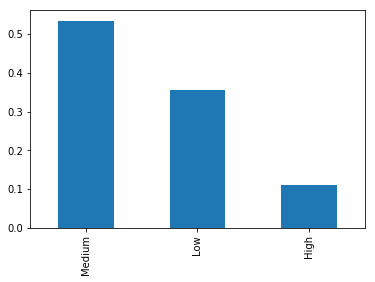

In [9]:
(df_2['Assigned Line'].value_counts()/len(df_2)).plot(kind='bar')

In [10]:
print('before drop columns with 10% or less data', df_2.shape)

before drop columns with 10% or less data (34000, 19)


In [11]:
for col_name in missing[missing['%missing']<0.1].index:
    df_2.drop(df_2[df_2[col_name].isnull()].index, axis=0, inplace=True)

print('after drop columns with 10% or less data', df_2.shape)

after drop columns with 10% or less data (29025, 19)


In [12]:
for columns in df_2.columns:
    print([columns, df_2[columns].dtype])

['ID', dtype('int64')]
['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['TSR', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Remit', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['preferred_spend_line', dtype('float64')]
['total_cards', dtype('O')]
['preferred_bal_line', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [13]:
df_2['total_cards'].unique()
df_3=df_2.dropna(axis=0)

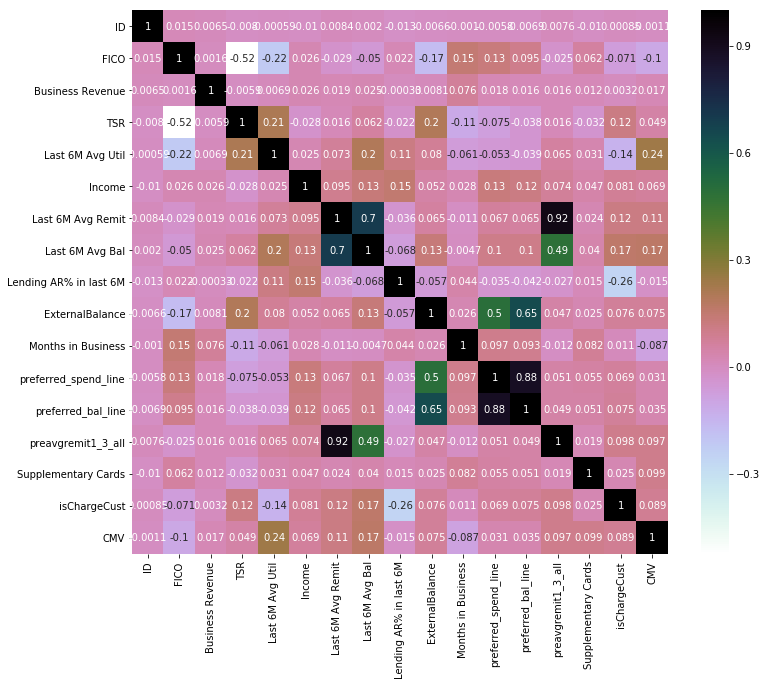

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_2.corr(), annot=True, cmap='cubehelix_r')
plt.show()

#high correlation pair
#TSR-FICO
#isChargedcust-lending AR% in 6months
#preavgremit_3-last 6month avg remit

In [15]:
y_1 =np.array(df_3['TSR']).reshape(-1,1)
x_1 =np.array(df_3['FICO']).reshape(-1,1)
lin_reg =LinearRegression()
lin_reg.fit(x_1, y_1)
print(x_1.shape, y_1.shape)
print(lin_reg.coef_, lin_reg.intercept_)
print(lin_reg.score(x_1, y_1))

(8930, 1) (8930, 1)
[[-2.57888168]] [2579.57994947]
0.2796305444979529


In [16]:
for col2 in df_2.columns:
    print([col2, df_2[col2].dtype])

['ID', dtype('int64')]
['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['TSR', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Remit', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['preferred_spend_line', dtype('float64')]
['total_cards', dtype('O')]
['preferred_bal_line', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [17]:
# missing data handling

# fill TSR base on FICO
df_2['TSR'] =df_2['TSR'].fillna(df_2['FICO']*lin_reg.coef_[0]+lin_reg.intercept_[0])
df_2['TSR'].isnull().sum()

# Months in Business  no obvious trends, use simple techniques instead
df_2['Months in Business'] =df_2['Months in Business'].fillna(df_2['Months in Business'].median())

# preferred_spend_line & preferred_bal_line & ExternalBalance are highly correlated
df_2.drop(['ID','preferred_spend_line', 'preferred_bal_line', 'TSR', 'Last 6M Avg Remit', 'Last 6M Avg Remit'], axis=1, inplace=True)
df_2['ExternalBalance'] =df_2['ExternalBalance'].fillna(df_2['ExternalBalance'].mean())

# Lending AR% in last 6M (what is the domain knowledge on this topic?)
df_2['Lending AR% in last 6M'] =df_2['Lending AR% in last 6M'].fillna(df_2['Lending AR% in last 6M'].mean())

# income
df_2['Income'] =df_2['Income'].fillna(df_2['Income'].mean())

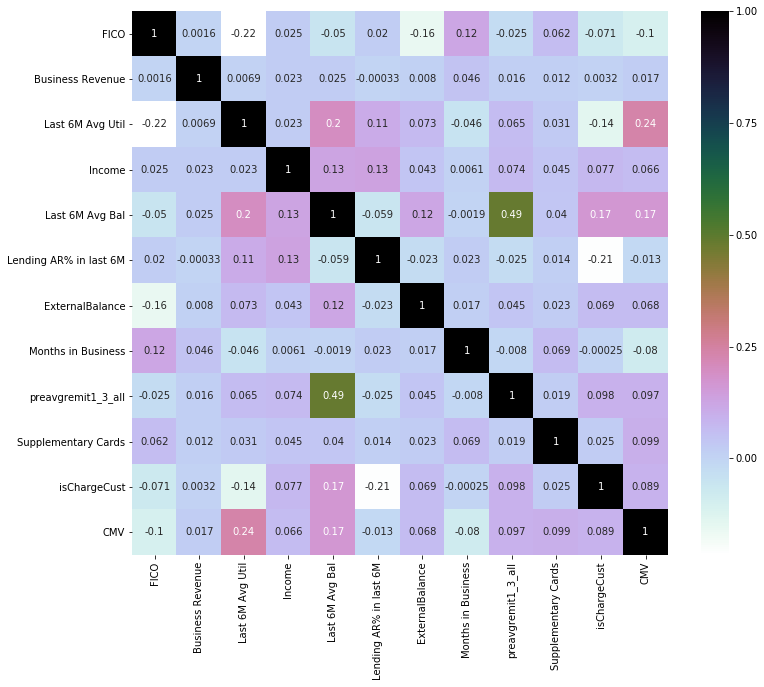

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df_2.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [19]:
print(df_2.columns)
print(df_2.isnull().sum().sort_values(ascending=False)/len(df_2))

Index(['FICO', 'Business Revenue', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Bal', 'Lending AR% in last 6M', 'ExternalBalance',
       'Months in Business', 'total_cards', 'preavgremit1_3_all',
       'Supplementary Cards', 'isChargeCust', 'CMV', 'Assigned Line'],
      dtype='object')
Assigned Line             0.0
CMV                       0.0
isChargeCust              0.0
Supplementary Cards       0.0
preavgremit1_3_all        0.0
total_cards               0.0
Months in Business        0.0
ExternalBalance           0.0
Lending AR% in last 6M    0.0
Last 6M Avg Bal           0.0
Income                    0.0
Last 6M Avg Util          0.0
Business Revenue          0.0
FICO                      0.0
dtype: float64


In [20]:
#feature selection

df_2['total_cards'].replace({'.':0}, inplace=True)
df_2['total_cards'] =df_2['total_cards'].astype('float64')

In [21]:
for col2 in df_2.columns:
    print([col2, df_2[col2].dtype])

['FICO', dtype('float64')]
['Business Revenue', dtype('float64')]
['Last 6M Avg Util', dtype('float64')]
['Income', dtype('float64')]
['Last 6M Avg Bal', dtype('float64')]
['Lending AR% in last 6M', dtype('float64')]
['ExternalBalance', dtype('float64')]
['Months in Business', dtype('float64')]
['total_cards', dtype('float64')]
['preavgremit1_3_all', dtype('float64')]
['Supplementary Cards', dtype('int64')]
['isChargeCust', dtype('int64')]
['CMV', dtype('float64')]
['Assigned Line', dtype('O')]


In [22]:
df_2['Assigned Line'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [23]:
df_var=df_2.drop(['Assigned Line'],axis=1)
df_target =df_2['Assigned Line'].replace({'Low':1, 'Medium':10, 'High':100})
df_3 =df_2
df_3['Assigned Line'] =df_2['Assigned Line'].replace({'Low':1, 'Medium':2, 'High':3}).astype('float64')
print(df_var.shape, df_target.shape)

(29025, 13) (29025,)


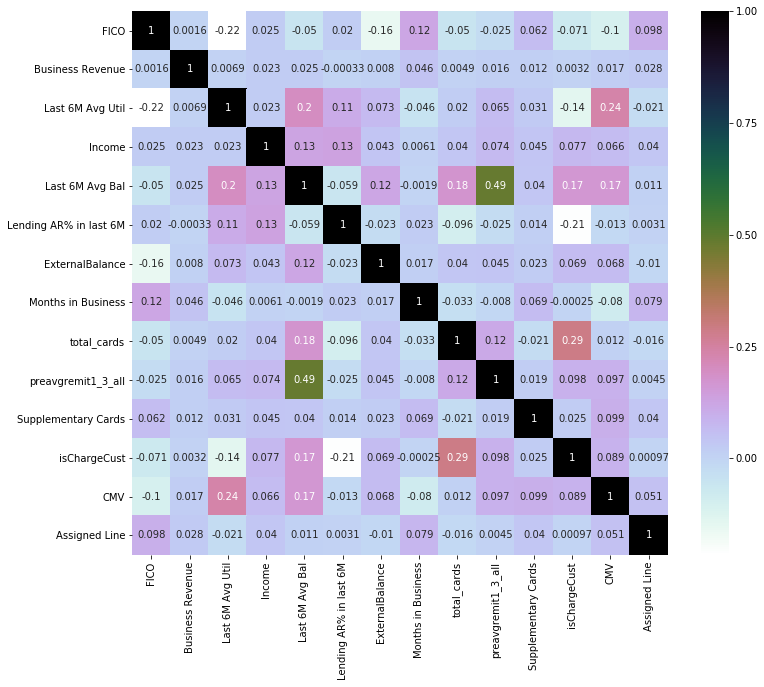

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df_3.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [25]:
# split data for testing

x_train, x_test, y_train, y_test =train_test_split(df_var, df_target, train_size=0.75, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(21768, 13) (7257, 13) (21768,) (7257,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
# standardize

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-7.73983039e-02, -5.14548584e-04,  6.47090990e-01, ...,
        -5.77192227e-01,  1.48046913e+00, -3.81535267e-01],
       [-1.47516762e-01, -8.08615635e-02, -4.95317820e-01, ...,
         2.32550395e+00, -6.75461566e-01, -4.27811079e-01],
       [-1.08242953e+00, -5.95932360e-02, -5.82892513e-01, ...,
         8.74155860e-01, -6.75461566e-01, -7.22624709e-01],
       ...,
       [-3.57872135e-01, -5.95932360e-02, -6.61038643e-01, ...,
        -5.77192227e-01,  1.48046913e+00, -4.38022365e-01],
       [-9.88938253e-01, -8.55878586e-02, -5.48117761e-01, ...,
         8.74155860e-01, -6.75461566e-01, -4.85110748e-01],
       [ 1.20810675e+00, -7.61352686e-02,  1.25324640e-04, ...,
         2.32550395e+00, -6.75461566e-01, -4.64566291e-01]])

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error


In [28]:
forest_clf =RandomForestClassifier()
forest_clf.fit(x_train, y_train)
forest_y_pred =forest_clf.predict(x_test)
score =mean_squared_error(forest_y_pred, y_test)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1155.4303431169906


In [29]:
log_reg =LogisticRegression()
log_reg.fit(x_train, y_train)
log_y_pred =log_reg.predict(x_test)
log_score =mean_squared_error(log_y_pred, y_test)
print(log_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1015.7089706490285


In [30]:
# baseline, what if I assign everyone medium score
y_base_1 =y_test[y_test==1]
y_base_2 =y_test[y_test==10]
y_base_3 =y_test[y_test==100]
print(len(y_base_1)/len(y_test), len(y_base_2)/len(y_test), len(y_base_3)/len(y_test))

0.3427035965274907 0.5385145376877497 0.11878186578475955


In [31]:
print(np.unique(forest_y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))


(array([  1,  10, 100], dtype=int64), array([2529, 4543,  185], dtype=int64))
(array([  1,  10, 100], dtype=int64), array([2487, 3908,  862], dtype=int64))


In [32]:
print(np.unique(log_y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))


(array([  1,  10, 100], dtype=int64), array([ 853, 6399,    5], dtype=int64))
(array([  1,  10, 100], dtype=int64), array([2487, 3908,  862], dtype=int64))


In [33]:
from sklearn.metrics import accuracy_score

forest_score =accuracy_score(y_test, y_pred)
print(forest_score)

log_reg_score =accuracy_score(log_y_pred, y_test)
print(log_reg_score)


NameError: name 'y_pred' is not defined

In [ ]:
len(forest_y_pred[forest_y_pred==10])/len(forest_y_pred)